In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/ushape.csv', names=["X", "Y", "class"])

In [3]:
df.head()

X         Y  class
0  0.031595  0.986988    0.0
1  2.115098 -0.046244    1.0
2  0.882490 -0.075756    0.0
3 -0.055144 -0.037332    1.0
4  0.829545 -0.539321    1.0

In [4]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [5]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [6]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [8]:
model1 = Sequential()

model1.add(Dense(10,activation='sigmoid',input_dim=2))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                30        
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model2 = Sequential()

model2.add(Dense(10,activation='tanh',input_dim=2))
model2.add(Dense(1,activation='tanh'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                30        
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
model3 = Sequential()

model3.add(Dense(10,activation='relu',input_dim=2))
model3.add(Dense(1,activation='relu'))

model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                30        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
# Set parameters to 0
model3.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [43]:
initial_weights = model3.get_weights()

In [36]:
initial_weights[0] = np.zeros(model3.get_weights()[0].shape)
initial_weights[1] = np.zeros(model3.get_weights()[1].shape)
initial_weights[2] = np.zeros(model3.get_weights()[2].shape)
initial_weights[3] = np.zeros(model3.get_weights()[3].shape)

In [44]:
initial_weights[0] = np.ones(model3.get_weights()[0].shape)*0.5
initial_weights[1] = np.ones(model3.get_weights()[1].shape)*0.5
initial_weights[2] = np.ones(model3.get_weights()[2].shape)*0.5
initial_weights[3] = np.ones(model3.get_weights()[3].shape)*0.5

In [45]:
model3.set_weights(initial_weights)

In [46]:
model3.get_weights()

[array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]], dtype=float32),
 array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

In [47]:
model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [48]:
history = model3.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 98ms/step - loss: 6.7889 - accuracy: 0.5125 - val_loss: 5.4703 - val_accuracy: 0.6000
Epoch 2/100
3/3 [==============================] - 0s 18ms/step - loss: 6.7759 - accuracy: 0.5125 - val_loss: 5.4644 - val_accuracy: 0.6000
Epoch 3/100
3/3 [==============================] - 0s 16ms/step - loss: 6.6254 - accuracy: 0.5125 - val_loss: 5.4594 - val_accuracy: 0.6000
Epoch 4/100
3/3 [==============================] - 0s 17ms/step - loss: 6.6088 - accuracy: 0.5125 - val_loss: 5.4554 - val_accuracy: 0.6000
Epoch 5/100
3/3 [==============================] - 0s 17ms/step - loss: 6.5999 - accuracy: 0.5125 - val_loss: 5.4518 - val_accuracy: 0.6000
Epoch 6/100
3/3 [==============================] - 0s 17ms/step - loss: 6.5895 - accuracy: 0.5125 - val_loss: 5.4486 - val_accuracy: 0.6000
Epoch 7/100
3/3 [==============================] - 0s 25ms/step - loss: 6.5836 - accuracy: 0.5125 - val_loss: 5.4456 - val_accuracy: 0.6000
Epoch 8/100
3/3 [===

In [49]:
model3.get_weights()

[array([[0.56032735, 0.56032735, 0.56032735, 0.56032735, 0.56032735,
         0.56032735, 0.56032735, 0.56032735, 0.56032735, 0.56032735],
        [0.49833348, 0.49833348, 0.49833348, 0.49833348, 0.49833348,
         0.49833348, 0.49833348, 0.49833348, 0.49833348, 0.49833348]],
       dtype=float32),
 array([0.4420156, 0.4420156, 0.4420156, 0.4420156, 0.4420156, 0.4420156,
        0.4420156, 0.4420156, 0.4420156, 0.4420156], dtype=float32),
 array([[0.47607195],
        [0.47607195],
        [0.47607195],
        [0.47607195],
        [0.47607195],
        [0.47607195],
        [0.47607195],
        [0.47607195],
        [0.47607195],
        [0.47607195]], dtype=float32),
 array([0.36841783], dtype=float32)]

9600/9600 [==============================] - 14s 1ms/step


<Axes: >

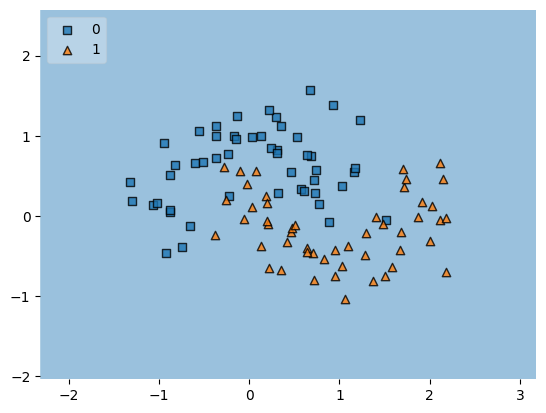

In [22]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)